#  *** STATS Assignment-8  ****

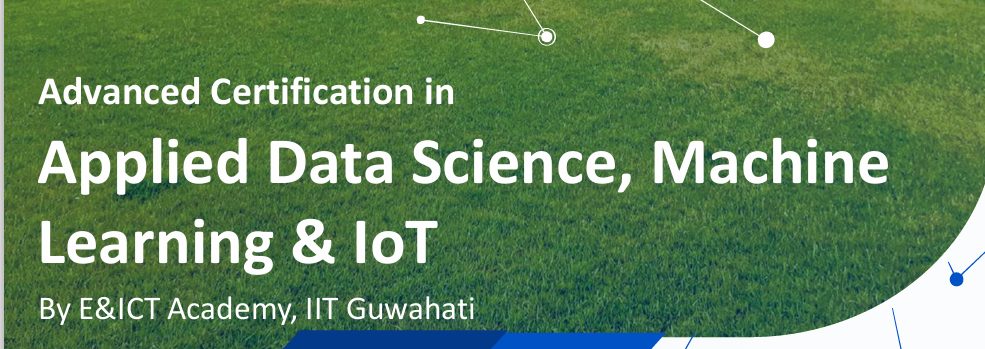

## Name: Rajesh Bisht
## Email Id: rbisht.india@gmail.com
## Batch-8 , Git: https://github.com/RajeshBisht28/Stats_Assignment8.git

### Q1. Import the attached CSV files (Diamond.csv) and answer the following questions:

### Question-1(A). Create 2 dataframes out of this dataframe – 1 with all numerical variables and other with all categorical variables.

In [2]:
import pandas as pd
# Load the CSV file
file_path = 'Diamonds.csv'
df = pd.read_csv(file_path)
# Separate numerical variables
numerical_df = df.select_dtypes(include=['number'])

# Separate categorical variables
categorical_df = df.select_dtypes(include=['object', 'category'])

# Display the first few rows of both dataframes to verify
numerical_df.head(), 
categorical_df.head()

(   carat  depth  table  weight  size  price
 0   0.23   61.5   55.0    3.95  3.98    326
 1   0.21   59.8   61.0    3.89  3.84    326
 2   0.23   56.9   65.0    4.05  4.07    327
 3   0.29   62.4   58.0    4.20  4.23    334
 4   0.31   63.3   58.0    4.34  4.35    335,
        cut color clarity
 0    Ideal     E     SI2
 1  Premium     E     SI1
 2     Good     E     VS1
 3  Premium     I     VS2
 4     Good     J     SI2)

### Question-1 (B) Calculate the measure of central tendency of numerical variables using Pandas and statistics libraries and check if the calculated values are different between these 2 libraries.

#### Central Tendency: refers to measuring the center or distribution of values in a dataset. It helps us understand the average value and the spread of data.

In [13]:
import statistics as stats
import pandas as pd
# Load the CSV file
file_path = 'Diamonds.csv'
df = pd.read_csv(file_path)
# Separate numerical variables
numerical_df = df.select_dtypes(include=['number'])
# Calculate central tendency using Pandas
pandas_mean = numerical_df.mean()
pandas_median = numerical_df.median()
pandas_mode = numerical_df.mode().iloc[0]

# Calculate central tendency using statistics library
stats_mean = numerical_df.apply(stats.mean)
stats_median = numerical_df.apply(stats.median)
stats_mode = numerical_df.apply(lambda x: stats.mode(x))

# Combine the results for comparison
comparison_df = pd.DataFrame({
    'Pandas Mean': pandas_mean,
    'Statistics Mean': stats_mean,
    'Pandas Median': pandas_median,
    'Statistics Median': stats_median,
    'Pandas Mode': pandas_mode,
    'Statistics Mode': stats_mode
})
# Display comparison b/w Pandas vs Stastics 
comparison_df


,Pandas Mean,Statistics Mean,Pandas Median,Statistics Median,Pandas Mode,Statistics Mode
carat,0.797940,0.797940,0.70,0.70,0.30,0.30
depth,61.749405,61.749405,61.80,61.80,62.00,62.00
table,57.457184,57.457184,57.00,57.00,56.00,56.00
weight,5.731157,5.731157,5.70,5.70,4.37,4.37
size,5.734526,5.734526,5.71,5.71,4.34,4.34
price,3932.799722,3932.799722,2401.00,2401.00,605.00,605.00


#### C.	Check the skewness of all numeric variables. Mention against each variable if its highly skewed/light skewed/ Moderately skwewed.

In [8]:
import statistics as stats
import pandas as pd
# Load the CSV file
file_path = 'Diamonds.csv'
df = pd.read_csv(file_path)
# Separate numerical variables
numerical_df = df.select_dtypes(include=['number'])
# Calculate skewness of all numerical variables
skewness = numerical_df.skew()
# Determine skewness level based on general thresholds
skewness_levels = skewness.apply(
    lambda x: "highly skewed" if abs(x) > 1 else ("Moderately skewed" if abs(x) > 0.5 else "light skewed")
)

# Combine skewness value and level into a DataFrame
skewness_df = pd.DataFrame({
    'Skewness': skewness,
    'Skewness Level': skewness_levels
})

skewness_df


,Skewness,Skewness Level
carat,1.116646,highly skewed
depth,-0.082294,light skewed
table,0.796896,Moderately skewed
weight,0.378676,light skewed
size,2.434167,highly skewed
price,1.618395,highly skewed


#### Question-1(D): Use the different transformation techniques to convert skewed data found in previous question into normal distribution.

##### Log Transformation

In [8]:
import statistics as stats
import pandas as pd
import numpy as np
file_path = 'Diamonds.csv'
df = pd.read_csv(file_path)
# Separate numerical variables
df_numeric = df.select_dtypes(include=['number'])

# Add a small constant (e.g., 1e-6) to avoid log(0)
logarithm_df = np.log(df_numeric + 1e-6)
print("======= Logarithm Transformation =======")
logarithm_df.head(10)

======= Logarithm Transformation =======


,carat,depth,table,weight,size,price
0,-1.469672,4.119037,4.007333,1.373716,1.381282,5.786897
1,-1.560643,4.091006,4.110874,1.358409,1.345473,5.786897
2,-1.469672,4.041295,4.174387,1.398717,1.403643,5.789960
3,-1.237871,4.133565,4.060443,1.435085,1.442202,5.811141
4,-1.171180,4.147885,4.060443,1.467875,1.470176,5.814131
5,-1.427112,4.139955,4.043051,1.371181,1.376244,5.817111
6,-1.427112,4.131961,4.043051,1.373716,1.381282,5.817111
7,-1.347070,4.125520,4.007333,1.403643,1.413423,5.820083
8,-1.514123,4.175925,4.110874,1.353255,1.329724,5.820083
9,-1.469672,4.084294,4.110874,1.386295,1.398717,5.823046


##### Square root transformation

In [9]:
import statistics as stats
import pandas as pd
import numpy as np
file_path = 'Diamonds.csv'
df = pd.read_csv(file_path)
# Separate numerical variables
df_numeric = df.select_dtypes(include=['number'])

# Add a small constant (e.g., 1e-6) to avoid sqrt(0)
print("======= Square Root Transformation =======")
square_root_df = np.sqrt(df_numeric + 1e-6)
square_root_df.head(10)

======= Square Root Transformation =======


,carat,depth,table,weight,size,price
0,0.479584,7.842194,7.416199,1.987461,1.994994,18.055470
1,0.458259,7.733046,7.810250,1.972309,1.959592,18.055470
2,0.479584,7.543209,8.062258,2.012461,2.017424,18.083141
3,0.538517,7.899367,7.615773,2.049390,2.056697,18.275667
4,0.556777,7.956130,7.615773,2.083267,2.085666,18.303005
5,0.489899,7.924645,7.549835,1.984944,1.989975,18.330303
6,0.489899,7.893035,7.549835,1.987461,1.994994,18.330303
7,0.509903,7.867655,7.416199,2.017424,2.027314,18.357560
8,0.469043,8.068457,7.810250,1.967232,1.944222,18.357560
9,0.479584,7.707140,7.810250,2.000000,2.012461,18.384776


#### Cube Root Transformation

In [12]:
import statistics as stats
import pandas as pd
import numpy as np
file_path = 'Diamonds.csv'
df = pd.read_csv(file_path)
# Separate numerical variables
df_numeric = df.select_dtypes(include=['number'])
# Add a small constant (e.g., 1e-6) to avoid division error
print("======= Cube Root Transformation =======")
df_cuberoot = np.cbrt(df_numeric + 1e-6)
#Disply cube root transformation 
df_cuberoot.head(10)

======= Cube Root Transformation =======


,carat,depth,table,weight,size,price
0,0.612693,3.947223,3.802952,1.580759,1.584751,6.882389
1,0.594393,3.910513,3.936497,1.572715,1.565947,6.882389
2,0.612693,3.846249,4.020726,1.593988,1.596608,6.889419
3,0.661911,3.966385,3.870877,1.613429,1.617261,6.938232
4,0.676791,3.985363,3.870877,1.631160,1.632412,6.945150
5,0.621447,3.974842,3.848501,1.579424,1.582092,6.952053
6,0.621447,3.964265,3.848501,1.580759,1.584751,6.952053
7,0.638251,3.955763,3.802952,1.596608,1.601821,6.958943
8,0.603682,4.022787,3.936497,1.570015,1.557748,6.958943
9,0.612693,3.901774,3.936497,1.587401,1.593988,6.965820


#### Reciprocal Transformation

In [14]:
import statistics as stats
import pandas as pd
import numpy as np
file_path = 'Diamonds.csv'
df = pd.read_csv(file_path)
# Separate numerical variables
df_numeric = df.select_dtypes(include=['number'])
# Add a small constant (e.g., 1e-6) to avoid division error
print("======= Reciprocal Transformation =======")
reciproc_df = 1/(df_numeric + 1e-6)
reciproc_df.head(10)

======= Reciprocal Transformation =======


,carat,depth,table,weight,size,price
0,4.347807,0.016260,0.018182,0.253164,0.251256,0.003067
1,4.761882,0.016722,0.016393,0.257069,0.260417,0.003067
2,4.347807,0.017575,0.015385,0.246914,0.245700,0.003058
3,3.448264,0.016026,0.017241,0.238095,0.236407,0.002994
4,3.225796,0.015798,0.017241,0.230415,0.229885,0.002985
5,4.166649,0.015924,0.017544,0.253807,0.252525,0.002976
6,4.166649,0.016051,0.017544,0.253164,0.251256,0.002976
7,3.846139,0.016155,0.018182,0.245700,0.243309,0.002967
8,4.545434,0.015361,0.016393,0.258398,0.264550,0.002967
9,4.347807,0.016835,0.016393,0.250000,0.246914,0.002959


df['values']

print(df)

In [17]:
import pandas as pd
# Load the CSV file
file_path = 'Diamonds.csv'
df = pd.read_csv(file_path)
# Display the first few rows and identify numeric columns
df.head(10)
df.describe()


,carat,depth,table,weight,size,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,18823.000000


##### Question-1 (E) Create a user defined function in python to check the outliers using IQR method. Then pass all numeric variables in that function to check outliers.

In [5]:
# Function Check Outlier sing IQR - interquartile range
def check_outliers_by_IQR(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        #outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        
    return outliers



In [18]:
import statistics as stats
import pandas as pd
import numpy as np
file_path = 'Diamonds.csv'
df = pd.read_csv(file_path)
# Separate numerical variables
df_numeric = df.select_dtypes(include=['number'])

for column in df_numeric:
    Q1 = df_numeric[column].quantile(0.25)
    Q3 = df_numeric[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #print(df_numeric[column].name)
    out_lier = df_numeric[(df_numeric[column] < lower_bound) | (df_numeric[column] > upper_bound)]
    print(out_lier)
    #print(f"{column}\t Max \t  Min \t OutLier")
    

#outliers_data = check_outliers_by_IQR(df)
#outliers_data


       carat  depth  table  weight  size  price
12246   2.06   61.2   58.0    8.10  8.07   5203
13002   2.14   69.4   57.0    7.74  7.70   5405
13118   2.15   65.5   57.0    8.01  7.95   5430
13757   2.22   66.7   56.0    8.04  8.02   5607
13991   2.01   67.4   58.0    7.71  7.64   5696
...      ...    ...    ...     ...   ...    ...
27741   2.15   62.6   54.0    8.29  8.35  18791
27742   2.04   58.1   60.0    8.37  8.28  18795
27744   2.29   61.8   59.0    8.52  8.45  18797
27746   2.07   62.5   55.0    8.20  8.13  18804
27749   2.29   60.8   60.0    8.50  8.47  18823

[1889 rows x 6 columns]
       carat  depth  table  weight  size  price
2       0.23   56.9   65.0    4.05  4.07    327
8       0.22   65.1   61.0    3.87  3.78    337
24      0.31   58.1   62.0    4.44  4.47    353
35      0.23   58.2   59.0    4.06  4.08    402
42      0.26   65.2   56.0    3.99  4.02    403
...      ...    ...    ...     ...   ...    ...
53882   0.71   65.4   59.0    5.62  5.58   2747
53886   0.70   

#### Question-1 (F) Convert categorical variables into numerical variables using LabelEncoder technique

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

file_path = 'Diamonds.csv'
df = pd.read_csv(file_path)
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Encode categorical columns
df['cut'] = label_encoder.fit_transform(df['cut'])
df['color'] = label_encoder.fit_transform(df['color'])
df['clarity'] = label_encoder.fit_transform(df['clarity'])
# Display the first few rows of the updated dataset
df.head()



,carat,cut,color,clarity,depth,table,weight,size,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,326
1,0.21,3,1,2,59.8,61.0,3.89,3.84,326
2,0.23,1,1,4,56.9,65.0,4.05,4.07,327
3,0.29,3,5,5,62.4,58.0,4.20,4.23,334
4,0.31,1,6,3,63.3,58.0,4.34,4.35,335


#### Question-1 (G)	Use both the feature scaling techniques (standardscaler/min max scaler) on all the variables.

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

file_path = 'Diamonds.csv'
df = pd.read_csv(file_path)
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Encode categorical columns
df['cut'] = label_encoder.fit_transform(df['cut'])
df['color'] = label_encoder.fit_transform(df['color'])
df['clarity'] = label_encoder.fit_transform(df['clarity'])
# Initialize the scalers
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# Apply StandardScaler
df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)

# Apply MinMaxScaler
df_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)

# Display the first few rows after applying StandardScaler and MinMaxScaler

print("====== Min Max Scalling ======")
df_min_max_scaled.head(5)


====== Min Max Scalling ======


,carat,cut,color,clarity,depth,table,weight,size,price
0,0.006237,0.50,0.166667,0.428571,0.513889,0.230769,0.367784,0.067572,0.000000
1,0.002079,0.75,0.166667,0.285714,0.466667,0.346154,0.362197,0.065195,0.000000
2,0.006237,0.25,0.166667,0.571429,0.386111,0.423077,0.377095,0.069100,0.000054
3,0.018711,0.75,0.833333,0.714286,0.538889,0.288462,0.391061,0.071817,0.000433
4,0.022869,0.25,1.000000,0.428571,0.563889,0.288462,0.404097,0.073854,0.000487


In [34]:
print("===== Standard Scalling =====")
df_standard_scaled.head(5)

===== Standard Scalling =====


,carat,cut,color,clarity,depth,table,weight,size,price
0,-1.198168,-0.538099,-0.937163,-0.484264,-0.174092,-1.099672,-1.587837,-1.536196,-0.904095
1,-1.240361,0.434949,-0.937163,-1.064117,-1.360738,1.585529,-1.641325,-1.658774,-0.904095
2,-1.198168,-1.511147,-0.937163,0.095589,-3.385019,3.375663,-1.498691,-1.457395,-0.903844
3,-1.071587,0.434949,1.414272,0.675442,0.454133,0.242928,-1.364971,-1.317305,-0.902090
4,-1.029394,-1.511147,2.002131,-0.484264,1.082358,0.242928,-1.240167,-1.212238,-0.901839


##### Question-1 (H) Create the Histogram for all numeric variables and draw the KDE plot on that.

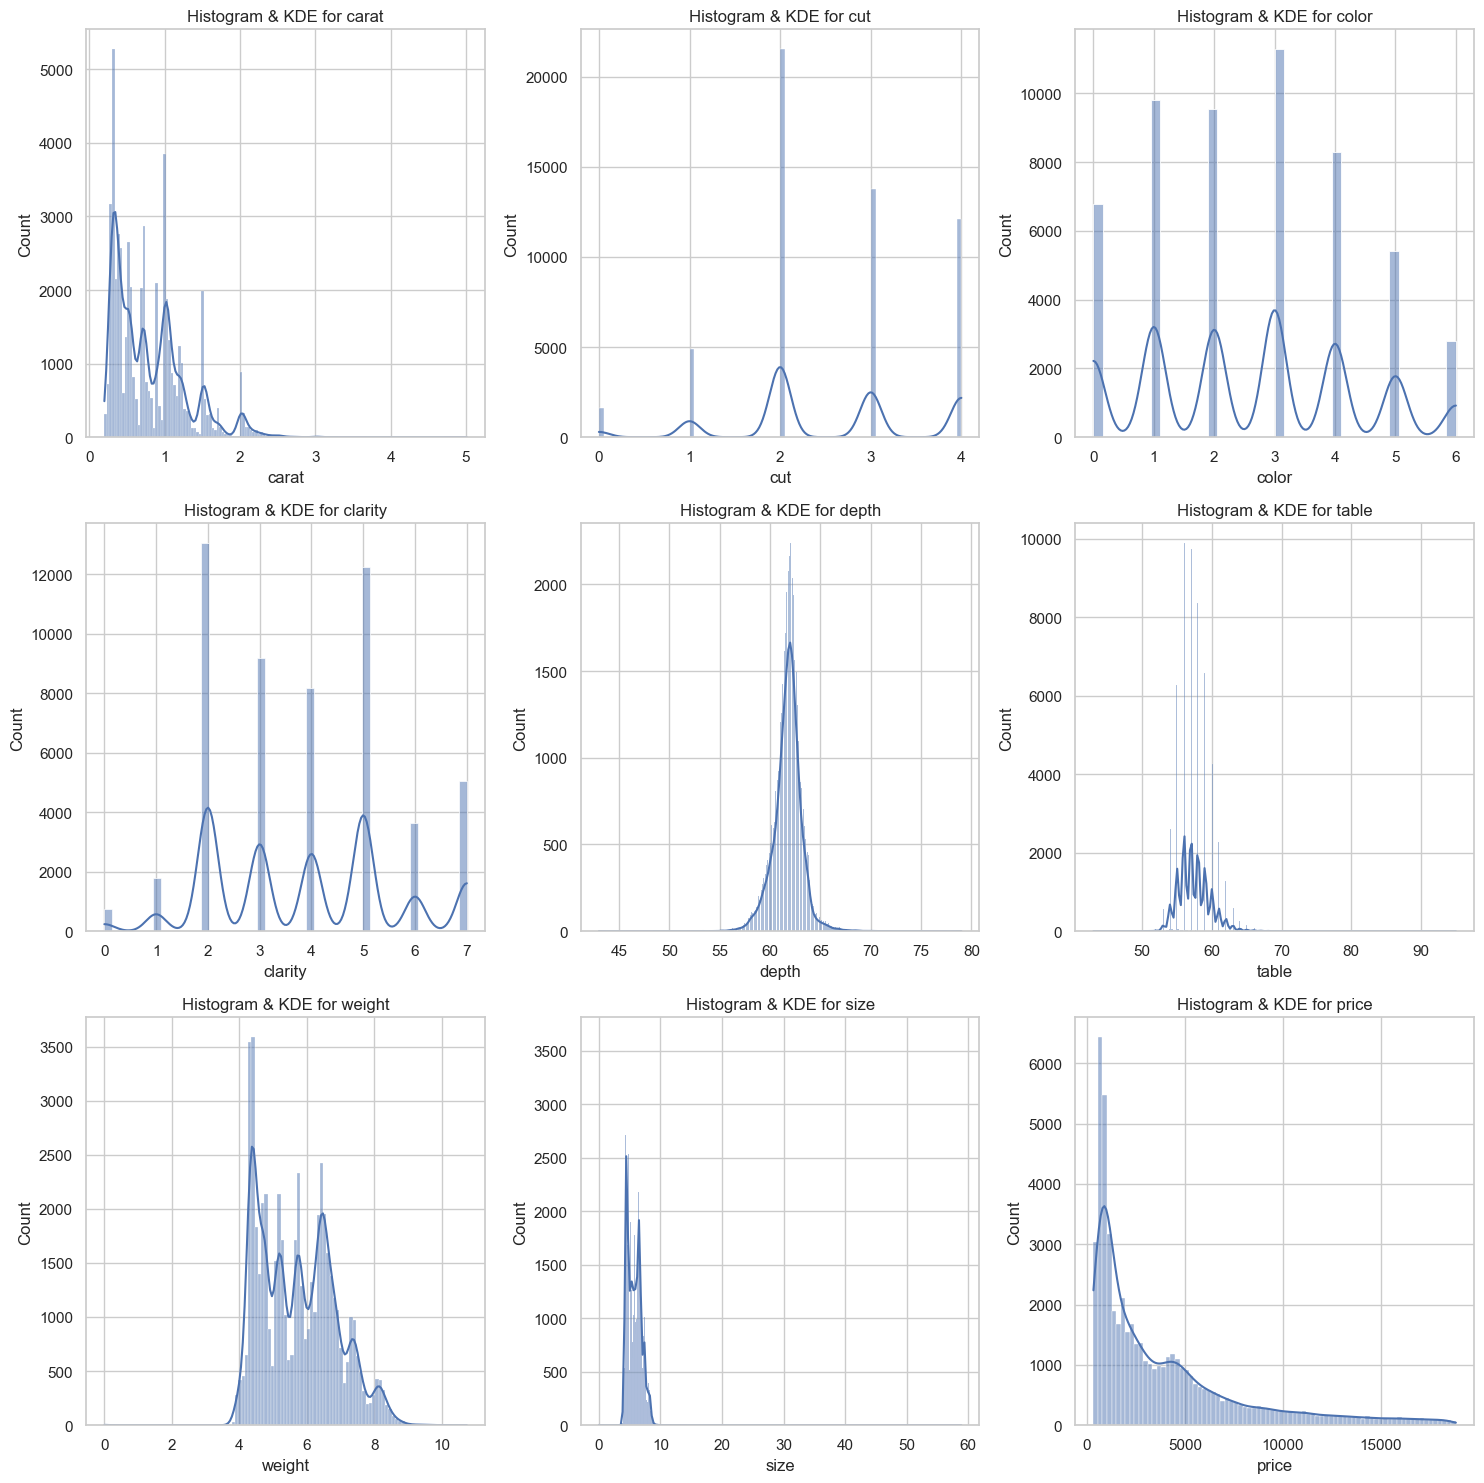

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings("ignore", category=FutureWarning)
file_path = 'Diamonds.csv'
df = pd.read_csv(file_path)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Encode categorical columns
df['cut'] = label_encoder.fit_transform(df['cut'])
df['color'] = label_encoder.fit_transform(df['color'])
df['clarity'] = label_encoder.fit_transform(df['clarity'])
# Set the style for the plots
sns.set(style="whitegrid")
# Create histograms with KDE plots for all numeric variables
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for i, col in enumerate(df.columns):
    ax = axes[i // 3, i % 3]
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Histogram & KDE for {col}')

plt.tight_layout()
plt.show()


##### Question-1 (I) Check the correlation between all the numeric variables using HeatMap and try to draw some conclusion about the data

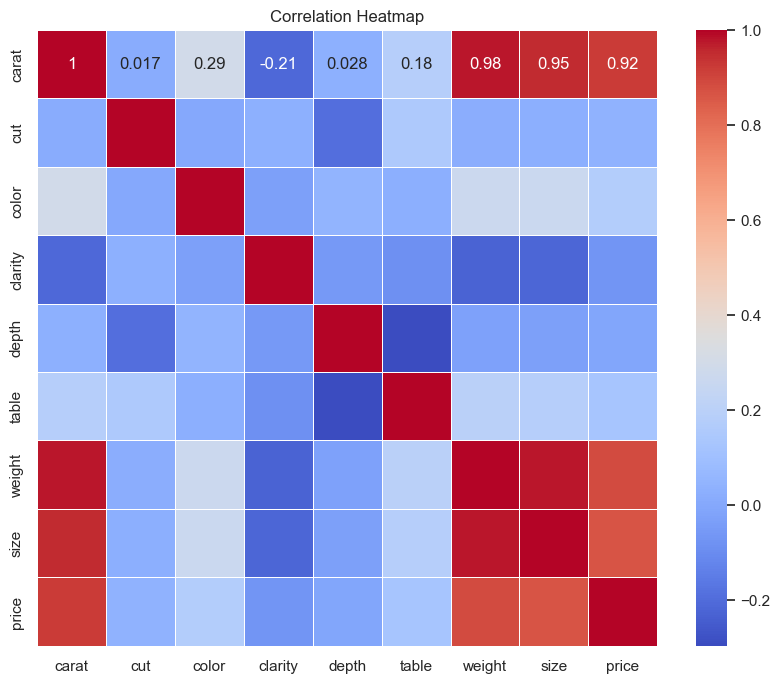

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##### Question-2: Explain Gradient descent in detail. How changing the values of learning rate can impact the convergence in Gradient Descent.

#### What is Gradient Descent?

###### Gradient Descent is an optimization algorithm used to minimize the cost (or loss) function in machine learning and deep learning models. It iteratively adjusts the model's parameters (e.g., weights in a neural network) to reduce the difference between the model's predictions and the actual data.

###### ### What is Gradient Descent?

Gradient Descent is an optimization algorithm used to minimize the cost (or loss) function in machine learning and deep learning models. It iteratively adjusts the model's parameters (e.g., weights in a neural network) to reduce the difference between the model's predictions and the actual data.

Here's a simple example of gradient descent in 3 steps:

Problem: Minimize the function f(x) = x^2 using gradient descent.### 

Step 1: Initialize

Initialize the learning rate α (a small positive value) = 0.1
Initialize the starting point x0 = 2 (our initial ### guess)
Step 2: Compute Gradient

Compute the gradient of the function f(x) at x0:
f'(x) = d/dx (x^2) = 2x
f'(2) = 2(2) = 4 (compute the gradient###  at x0 = 2)
Step 3: Update

Update the estimate of x using the gradient and learning rate:
x1 = x0 - α \* f'(x0)
x1 = 2 - 0.1 \* 4
x1 = 2 - 0.4
x1 = 1.6
So, after 1 iteration, our est#### imate of x is 1.6.

Repeat Steps 2-3 until convergence or a stopping criterion is reached.

### Learning algorithm converges.

1. **Small Learning Rate**:
   - **Pros**: Leads to a more accurate and stable convergence, as it takes small steps toward the minimum.
   - **Cons**: Convergence can be very slow, and it may take a long time  reach the minimum.

   

2. **Large Learning Rate**:
   - **Pros**: Convergence is faster because the steps taken are larger.
   - **Cons**: Risks overshooting the minimum, leading to divergence or oscillation around the minimum without ever settling down.


3. **Optimal Learning Rate**:
   - The ideal learning rate is one that is large enough to converge quickly but small enough to avoid overshooting the minimum.
   - Often, learning rates are tuned using techniques like learning rate schedules or adaptive methods (e.g., Adam optimizer).


### Convergence in Gradient Descent:

- **Convergence** refers to the process where the cost function approaches its minimum value. The choice of the learning rate directly impacts the convergence:
  - **Too Small**: Slow convergence, but more likely to reach the global minimum.
  - **Too Large**: Fast, but risks missing the minimum or diverging.
  - **Adaptive Learning Rate**: Adjusts dynamically, balancing speed and accuracy.

### Summary:

- Gradient Descent is fundamental for training machine learning models by iteratively minimizing the cost function.
- The learning rate is a critical factor in determining how the algorithm converges.
- Choosing the right learning rate is essential: too small can be slow, too large can cause divergence, and the optimal rate leads to efficient and effective training.

Understanding these concepts helps in fine-tuning models for better performance in various machine learning tasks.

#### Below sample data scattered

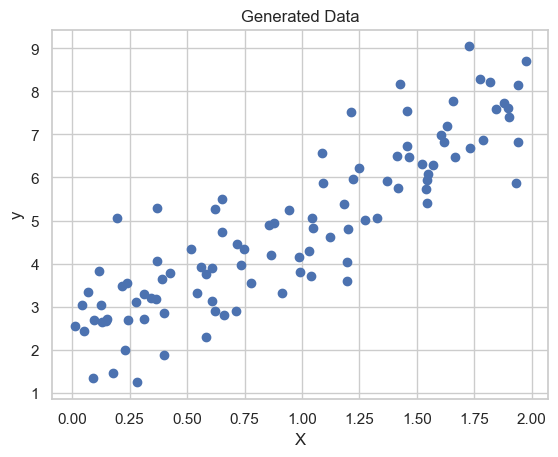

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 3 * X + 2 + np.random.randn(100, 1)

# Plot the generated data
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Generated Data")
plt.show()

In [15]:
def compute_cost(X, y, m, b):
    """Compute Mean Squared Error"""
    N = len(y)
    predictions = m * X + b
    cost = (1 / (2 * N)) * np.sum((predictions - y) ** 2)
    return cost

In [16]:
def gradient_descent(X, y, m, b, learning_rate, iterations):
    """Perform Gradient Descent"""
    N = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = m * X + b
        m_gradient = -(2/N) * np.sum(X * (y - predictions))
        b_gradient = -(2/N) * np.sum(y - predictions)

        m -= learning_rate * m_gradient
        b -= learning_rate * b_gradient

        cost = compute_cost(X, y, m, b)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: m = {m:.4f}, b = {b:.4f}, cost = {cost:.4f}")

    return m, b, cost_history

Iteration 0: m = 0.1101, b = 0.0964, cost = 12.3159


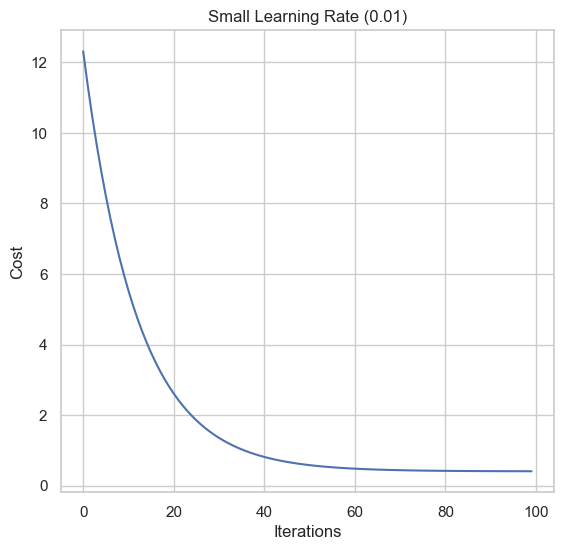

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
m_initial = 0
b_initial = 0
iterations = 100

# Learning rates
learning_rate_small = 0.01
learning_rate_large = 0.5
# Gradient Descent with small learning rate
m_small, b_small, cost_history = gradient_descent(X, y, m_initial, b_initial, learning_rate_small, iterations)

# Gradient Descent with large learning rate
#m_large, b_large, cost_history_large = gradient_descent(X, y, m_initial, b_initial, learning_rate_large, iterations)

# Plot cost history
plt.figure(figsize=(14, 6))

# Small learning rate
plt.subplot(1, 2, 1)
plt.plot(range(iterations), cost_history, 'b-')
plt.title(f"Small Learning Rate ({learning_rate_small})")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()
